In [19]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
def open_file(a, b, c):
    """
    opens the data files and returns a final data frame to be used for analysis
    :param a: File 1.
    :param b: File 2.
    :param c: File 3.
    :return: Returns final data frame to analyse.
    """
    global finaldf
    with open(a, encoding="utf8") as csvfile1:
        readCSV1 = csv.reader(csvfile1, delimiter=',')
        df1 = pd.read_csv(csvfile1, low_memory = False)
        dfnew1 = df1.iloc[:, [0, 7, 8]]
        dfnew1 = dfnew1.astype({'NAME': str})
        #print(dfnew1.head())

    with open(b) as csvfile2:
        readCSV2 = csv.reader(csvfile2, delimiter=',')
        df2 = pd.read_csv(csvfile2)
        df2['chronname']=df2['chronname'].map(lambda x: x.upper())
        dfnew2 = df2.iloc[:, [1, 5, 12]]
        #print(dfnew2.head())

    with open(c, encoding="utf8") as csvfile3:
        readCSV3 = csv.reader(csvfile3, delimiter=',')
        df3 = pd.read_csv(csvfile3, low_memory=False)
        df3['Unnamed: 0'] = df3['Unnamed: 0'].map(lambda x: x.upper())
        dfnew3 = df3.iloc[:, [0, 2, 3, 4, 7, 8, 15, 18]]
        #print(dfnew3.head())

    merge1 = pd.merge(dfnew1, dfnew2, left_on='NAME', right_on='chronname', how='inner')

    merge2 = pd.merge(merge1, dfnew3, left_on='NAME', right_on='Unnamed: 0', how='inner')

    finaldf = merge2.iloc[:, [0, 1, 2, 4, 7, 8, 9, 10, 11, 12, 13]]
    return finaldf

In [33]:
def sector_dataframes(finaldf):
    """
    Returns 3 data frames divided according to sectors.
    :param finaldf: The data frame which needs to be divided in 3 sectors.
    :return public: Public sector data frame.
    :return privateP: Private for-profit sector data frame.
    :return privateNP: private for non-profit sector data frame.
    """
    global public
    global privateP
    global privateNP
    public = finaldf[finaldf['control'] == 'Public']

    privateP = finaldf[finaldf['control'] == 'Private for-profit']

    privateNP = finaldf[finaldf['control'] == 'Private not-for-profit']
    return public, privateP, privateNP

In [34]:
def calc(df, col1, col2):
    """
    Returns a list of column by performing calculations.
    :param df: The data frame whose columns are used for calculations.
    :param col1: First column used for calculation
    :param col2: Second column used for calculaion.
    :return new_col: List created by performing calculations on required columns.
    """
    global new_col
    new_col = []
    for line in df:
        new_col = (100/df[col1])*df[col2]
        return new_col


In [35]:
def calc_mean(df1, df2, df3, col1, col2, col3):
    """
    Calculats the mean of 3 inputs columns.
    :param df1: The first data frame whose column's mean is to be calculated.
    :param df2: The second data frame whose column's mean is to be calculated.
    :param df3: The third data frame whose column's mean is to be calculated.
    :param col1: Column from data frame 1.
    :param col2: Column from data frame 2.
    :param col3: Column from data frame 3.
    :return p1: Returns mean of column of data frame 1.
    :return p2: Returns mean of column of data frame 2.
    :return p3: Returns mean of column of data frame 3.
    
    >>> calc_mean(finaldf, finaldf, finaldf, 'F.Undergrad', 'P.Undergrad', 'Accept')
    (3342.964125560538, 758.5717488789238, 1938.3878923766815)

    >>> calc_mean(finaldf, public, privateP, 'TOT_ENROLL', 'TOT_ENROLL', 'TOT_ENROLL')
    (7051.206278026906, 16688.3125, 3613.6)
    """
    global p1
    global p2
    global p3
    p1 = df1[col1].mean()
    p2 = df2[col2].mean()
    p3 = df3[col3].mean()
    return p1, p2, p3

In [36]:
def graph(p1, p2, p3, ylab, color1, color2, color3):
    """
    Returns a bar graph of 3 variables
    :param p1: Vairiable 1.
    :param p2: Vairiable 2.
    :param p3: Vairiable 3.
    :param ylab: Label for y axis of graph
    :param color1: color for variable 1.
    :param color2: color for variable 2.
    :param color3: color for variable 3.
    :return: Returns a bar graph of 3 variables
    """
    names = ('Public', 'Private for profit', 'Private for non profit')
    values = (p1, p2, p3)
    plt.bar(names, values, color = [color1, color2, color3])
    plt.xlabel('SECTOR OF UNIVERSITY')
    plt.ylabel(ylab)
    plt.show()

In [37]:
open_file("C:/Users/ssawai2/Desktop/Final/Colleges_and_Universities.csv","C:/Users/ssawai2/Desktop/Final/cc_institution_details.csv", "C:/Users/ssawai2/Desktop/Final/College_Data.csv")


,NAME,TOT_ENROLL,TOT_EMP,control,Apps,Accept,Enroll,F.Undergrad,P.Undergrad,S.F.Ratio,Grad.Rate
0,MORAVIAN COLLEGE,2446.0,652.0,Private not-for-profit,1232,955,303,1241,485,15.2,74
1,FREED-HARDEMAN UNIVERSITY,1972.0,342.0,Private not-for-profit,895,548,314,1174,50,16.1,62
2,COLUMBIA COLLEGE,13492.0,1442.0,Private for-profit,737,614,242,968,237,14.7,76
3,COLUMBIA COLLEGE,160.0,21.0,Private for-profit,737,614,242,968,237,14.7,76
4,COLUMBIA COLLEGE,2545.0,218.0,Private for-profit,737,614,242,968,237,14.7,76
...,...,...,...,...,...,...,...,...,...,...,...
441,FORT LEWIS COLLEGE,3332.0,665.0,Public,3440,2823,1123,3793,486,19.1,46
442,BERRY COLLEGE,2110.0,580.0,Private not-for-profit,1858,1221,480,1620,49,16.3,63
443,BRENAU UNIVERSITY,2932.0,524.0,Private not-for-profit,367,274,158,917,479,13.7,49
444,GEORGIA STATE UNIVERSITY,32816.0,5824.0,Public,3793,2341,1238,7732,9054,19.0,34


In [ ]:
# Hypothesis1
# Private universities have a higher success rate of students getting employed as compared to other sectors.
finaldf = finaldf.astype({'TOT_ENROLL': float, 'TOT_EMP': float})

calc(finaldf, 'TOT_ENROLL', 'TOT_EMP')
finaldf.insert(3, 'Emp_Rate', new_col)
sector_dataframes(finaldf)
calc_mean(public, privateNP, privateP, 'Emp_Rate', 'Emp_Rate', 'Emp_Rate')
graph(p1, p2, p3, 'EMPLOYEMENT RATE', 'orange', 'red', 'yellow')

#Hypothesis2
# Private universities have higher rate of acceptance of applications as compared to other sectors
calc(finaldf, 'Apps', 'Accept')
finaldf.insert(10, 'Accept_Rate', new_col)
sector_dataframes(finaldf)
calc_mean(public, privateP, privateNP, 'Accept_Rate', 'Accept_Rate', 'Accept_Rate')
graph(p1, p2, p3, 'ACCEPTANCE RATE', 'navy', 'pink', 'purple')


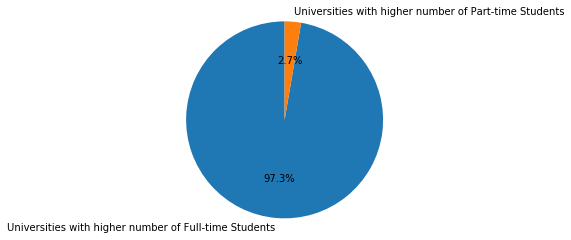

In [17]:
#Hypothesis3
# Full-time vs Part-time Students
finaldf = finaldf.astype({'F.Undergrad': float, 'P.Undergrad': float})
result = finaldf['F.Undergrad'] > finaldf['P.Undergrad']
#print(result)
r = result.values.tolist()
t = r.count(True)
f = r.count(False)
label = 'Universities with higher number of Full-time Students', 'Universities with higher number of Part-time Students'
part = [(t/446)*100, (f/446)*100]
fig1, ax1 = plt.subplots()
ax1.pie(part, labels=label, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  
plt.show()